In [107]:
# Any inquiries please contact me at aainaamahirah@gmail.com

# Target Market Analysis

> "Half the money I spend on advertising is wasted; the trouble is I don't know which half." <br>
> John Wanamaker (1838-1922): pioneer in marketing


You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [2]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [3]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [4]:
# View the statistic info of your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [5]:
data.shape

(4469, 25)

Number of rows : 4470<br>
Number of features : 25

#### List of features from our data:

In [6]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

## 2.2 What is the datatype of each column?

In [7]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1  Fix the type of the some columns as it should be.

In [8]:
# Check for column with dollar and comma sign 
item = ["Cust_Last_Purchase", "Pur_latest", "Pur_3_years_Avg", "Pur_5_years_Avg", "Cust_Ann_Income", "Pur_3_years_Avg_Indirect"]

for col in item:
    data[col] = data[col].str.replace(",","")
    data[col] = data[col].str.replace("$","")

data.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.00


In [9]:
# Create a list and set a variable to categorical and numerical columns
CatCols=['Potential_Customer', 'Status_Cust', 'Status_Latest_Ad', 'Gender', 'Cust_Prop']
NumCols=list(set(data.columns)-set(CatCols))

In [10]:
# Change the datatype for each column to category or float
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   float64 
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.3 Check data for duplicate rows and remove the duplicates

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool

In [12]:
data.duplicated().sum()

851

In [13]:
data=data.drop_duplicates()

In [14]:
data.duplicated().any()

False

## 2.4 Drop the columns you will not use in your analysis, if there is any.

We don't need the ''C_ID' column for our analysis so we will drop this column.

In [15]:
data = data.drop(['C_ID'], axis=1)

In [16]:
data.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

We have successfully drop 'C_ID' column from the dataset. But since we have assign variable for numerical and categorical column in our dataset, we have to drop this feature from our variable list too.

In [17]:
# 'C_ID' is in NumCols
NumCols.remove('C_ID')

In [18]:
NumCols

['InAct_First',
 'Pur_5_years',
 'Pur_latest',
 'Ad_Res_3_Year',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'Age',
 'Cust_Ann_Income',
 'Pur_3_years',
 'Pur_5_years_Avg',
 'Ad_Res_1_year',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_5_Year',
 'Cust_Last_Purchase']

We have successfully remove the 'C_ID' column from our list.

# 3. Exploratory Data Analysis (EDA)

Checking the relationship between variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.

## 3.1 Explore Categorical Variables

Explore each of the categorical variable by plotting the data using sns.countplot.

Number of categories in variable:  2

Proportions of categories in variable: 
 0    1882
1    1736
Name: Potential_Customer, dtype: int64

Percentage of categories in variable: 
 0    52.02
1    47.98
Name: Potential_Customer, dtype: float64


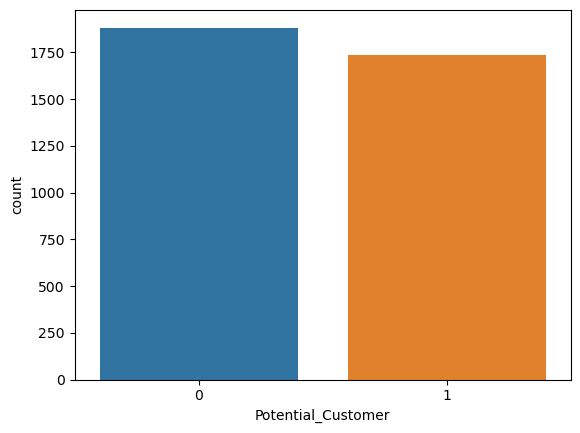

----------------------------------------------------------------------------------------------------
Number of categories in variable:  6

Proportions of categories in variable: 
 A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64

Percentage of categories in variable: 
 A    59.31
S    26.64
F     6.05
N     5.72
E     1.99
L     0.28
Name: Status_Cust, dtype: float64


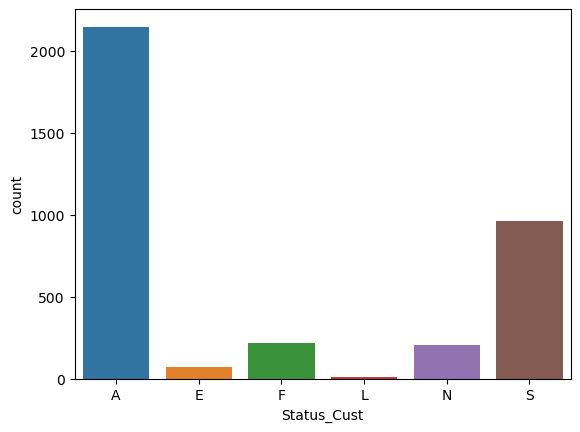

----------------------------------------------------------------------------------------------------
Number of categories in variable:  2

Proportions of categories in variable: 
 1    2057
0    1561
Name: Status_Latest_Ad, dtype: int64

Percentage of categories in variable: 
 1    56.85
0    43.15
Name: Status_Latest_Ad, dtype: float64


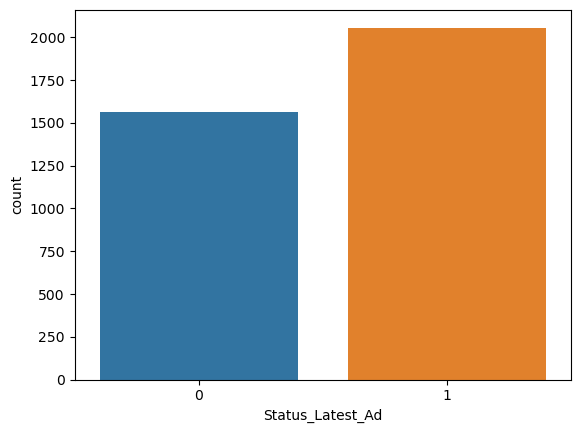

----------------------------------------------------------------------------------------------------
Number of categories in variable:  3

Proportions of categories in variable: 
 F    1922
M    1530
U     166
Name: Gender, dtype: int64

Percentage of categories in variable: 
 F    53.12
M    42.29
U     4.59
Name: Gender, dtype: float64


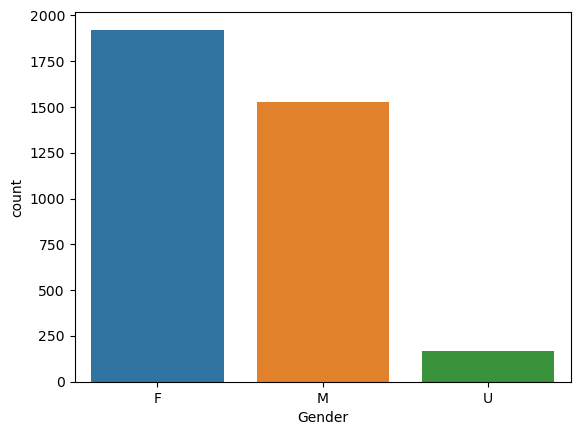

----------------------------------------------------------------------------------------------------
Number of categories in variable:  2

Proportions of categories in variable: 
 H    1981
U    1637
Name: Cust_Prop, dtype: int64

Percentage of categories in variable: 
 H    54.75
U    45.25
Name: Cust_Prop, dtype: float64


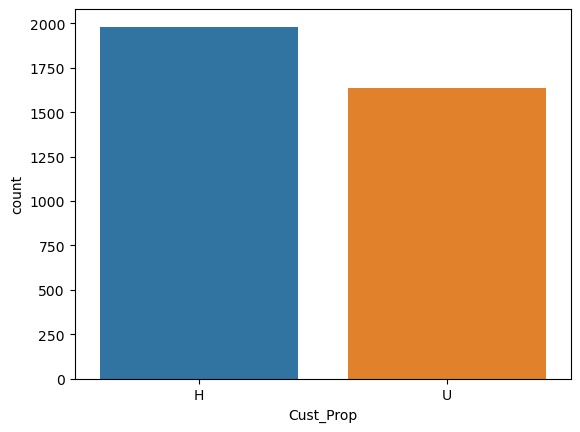

----------------------------------------------------------------------------------------------------


In [19]:
for var in CatCols:

    num_categories = data[var].nunique()
    print("Number of categories in variable: ", num_categories)
    print()
    
    # find the proportion of each category within the variable
    category_proportions = data[var].value_counts()
    print("Proportions of categories in variable: \n", category_proportions)
    print()
    
    # percentage of each category within the variable
    cat_percentage = (data[var].value_counts(normalize=True)*100).round(2)
    print("Percentage of categories in variable: \n", cat_percentage)
    
    # visualize the frequency of each category in the variable
    sns.countplot(data[var])
    plt.show()
    print('-'*100)

### 3.1.1 Insight

1. From 'Status_Cust' column, customer with status Active(A) and Star(S) proportion is very significantly high compared to the other status. Hence to balance out the proportion for our future analysis we can group the other status(E, F, L, N) to one category.
2. From 'Status_Latest_Ad' column, we found that the percentage of individual who has purchased in response to the last promotional sale is higher with percentage 56.85%.
3. In 'Gender' column, there is three category which is Male, Female and Unknown. For the future analysis, we might want to make change to the Unknown(U) category and only focus on Male and Female category.
4. Also from 'Gender' column we found that this dataset consist of more Female compare to Male.
5. From 'Cust_Prop' column, we can confirm that 54.75% of the customer in our dataset own a property(House) but the rest is Unknown.

### 3.1.2 Solution

We want to make change on the category of the 'Status_Cust' column to reduce the imbalance proportion of our data.

In [20]:
new_dict = {'A':'A','S':'S','E':'Others','F':'Others','N':'Others','L':'Others'}
data['Status_Cust'] = data['Status_Cust'].replace(new_dict)
data['Status_Cust'].unique()

['A', 'S', 'Others']
Categories (3, object): ['A', 'Others', 'S']

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

In [21]:
CatFes = list(set(CatCols)-set(['Potential_Customer']))

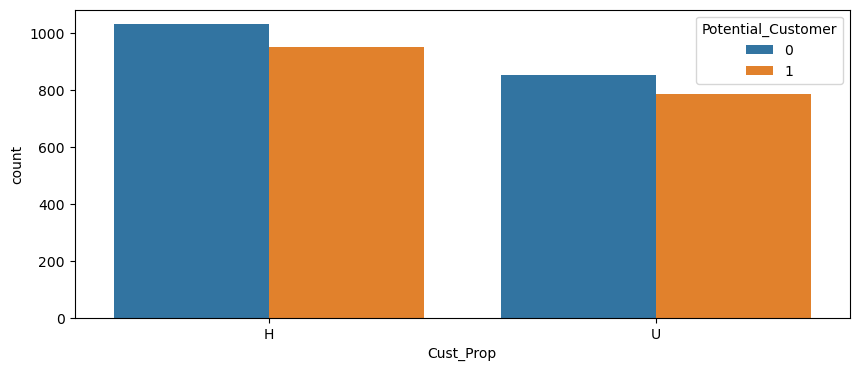

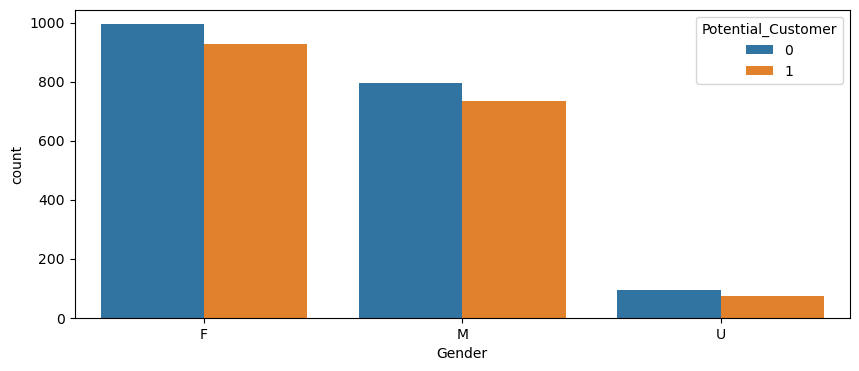

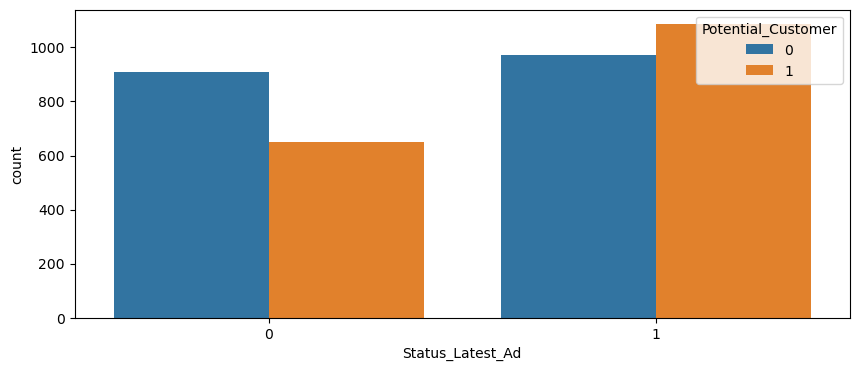

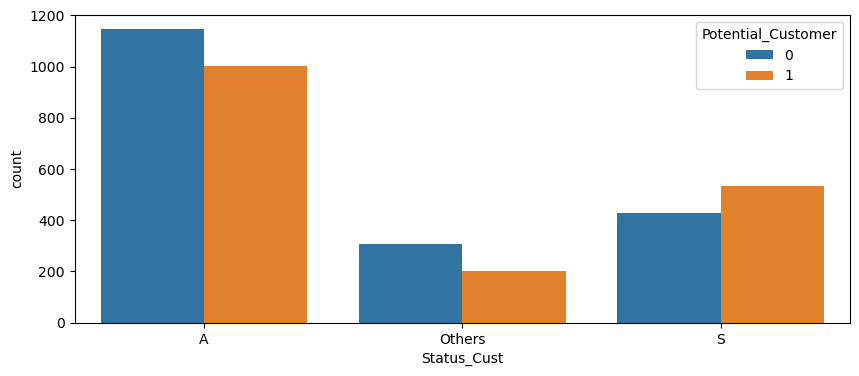

In [22]:
for feature in CatFes:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue='Potential_Customer', data=data)
    plt.show()

### 3.2.1 Insight

1. We can see from 'Gender' column plot, the trend for each category show similarities which the proportion of potential customer is lower compare to the non-potential customer.
2. We can also see this similar trend on 'Cust_Prop' column.
3. Meanwhile on the 'Status_Latest_Ad' we can see the trend is different for each category. For customer who responded buying from the latest advertisement, the probability of them become potential customer is higher.
4. The same things goes to 'Status_Cust' column where there is different trend going on different category. The probability of becoming potential customer is higher from the customer with Star buyer status.

## 3.3 Explore Numerical Variables

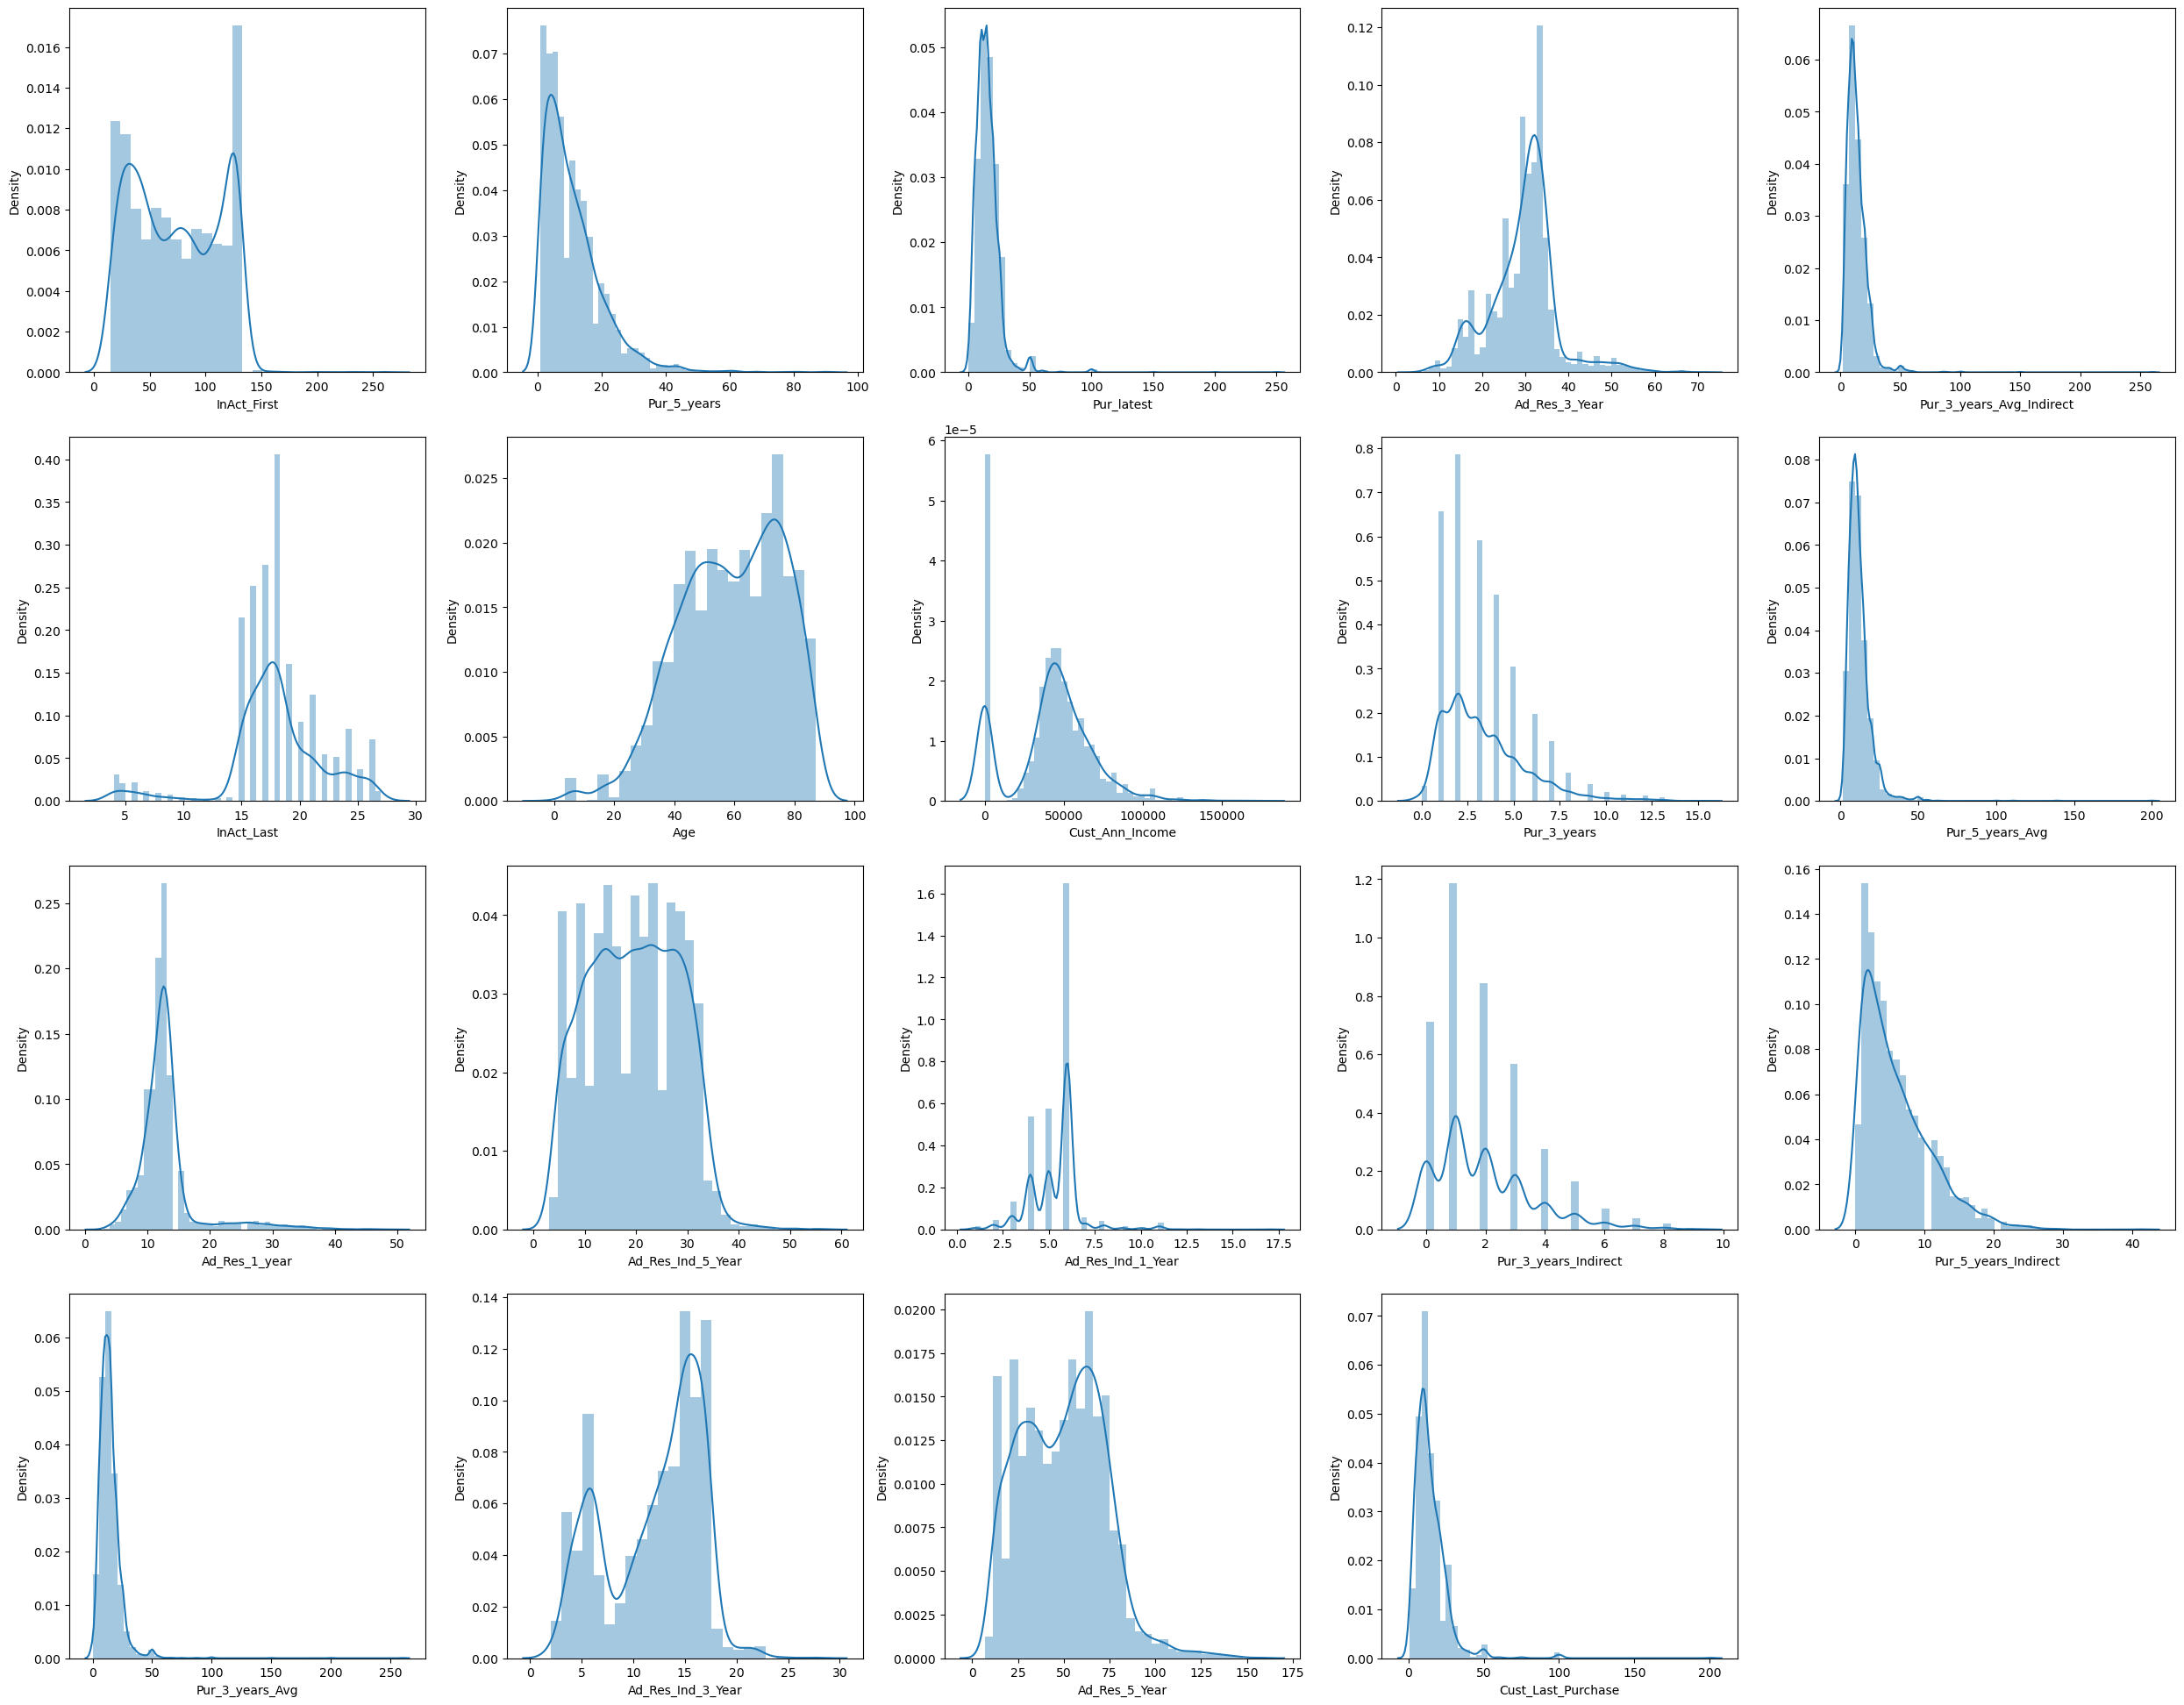

In [23]:
NumCols= list(set(data.columns)-set(CatCols))
   
fig, ax = plt.subplots(nrows=len(NumCols)//4+1, ncols=5, figsize=(25, 5*len(NumCols)//4+1))
ax = ax.ravel()
counter = 0
for i, col in enumerate(NumCols):
    sns.distplot(data[col], ax=ax[i])
    counter += 1
for i in range(counter, len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()


## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

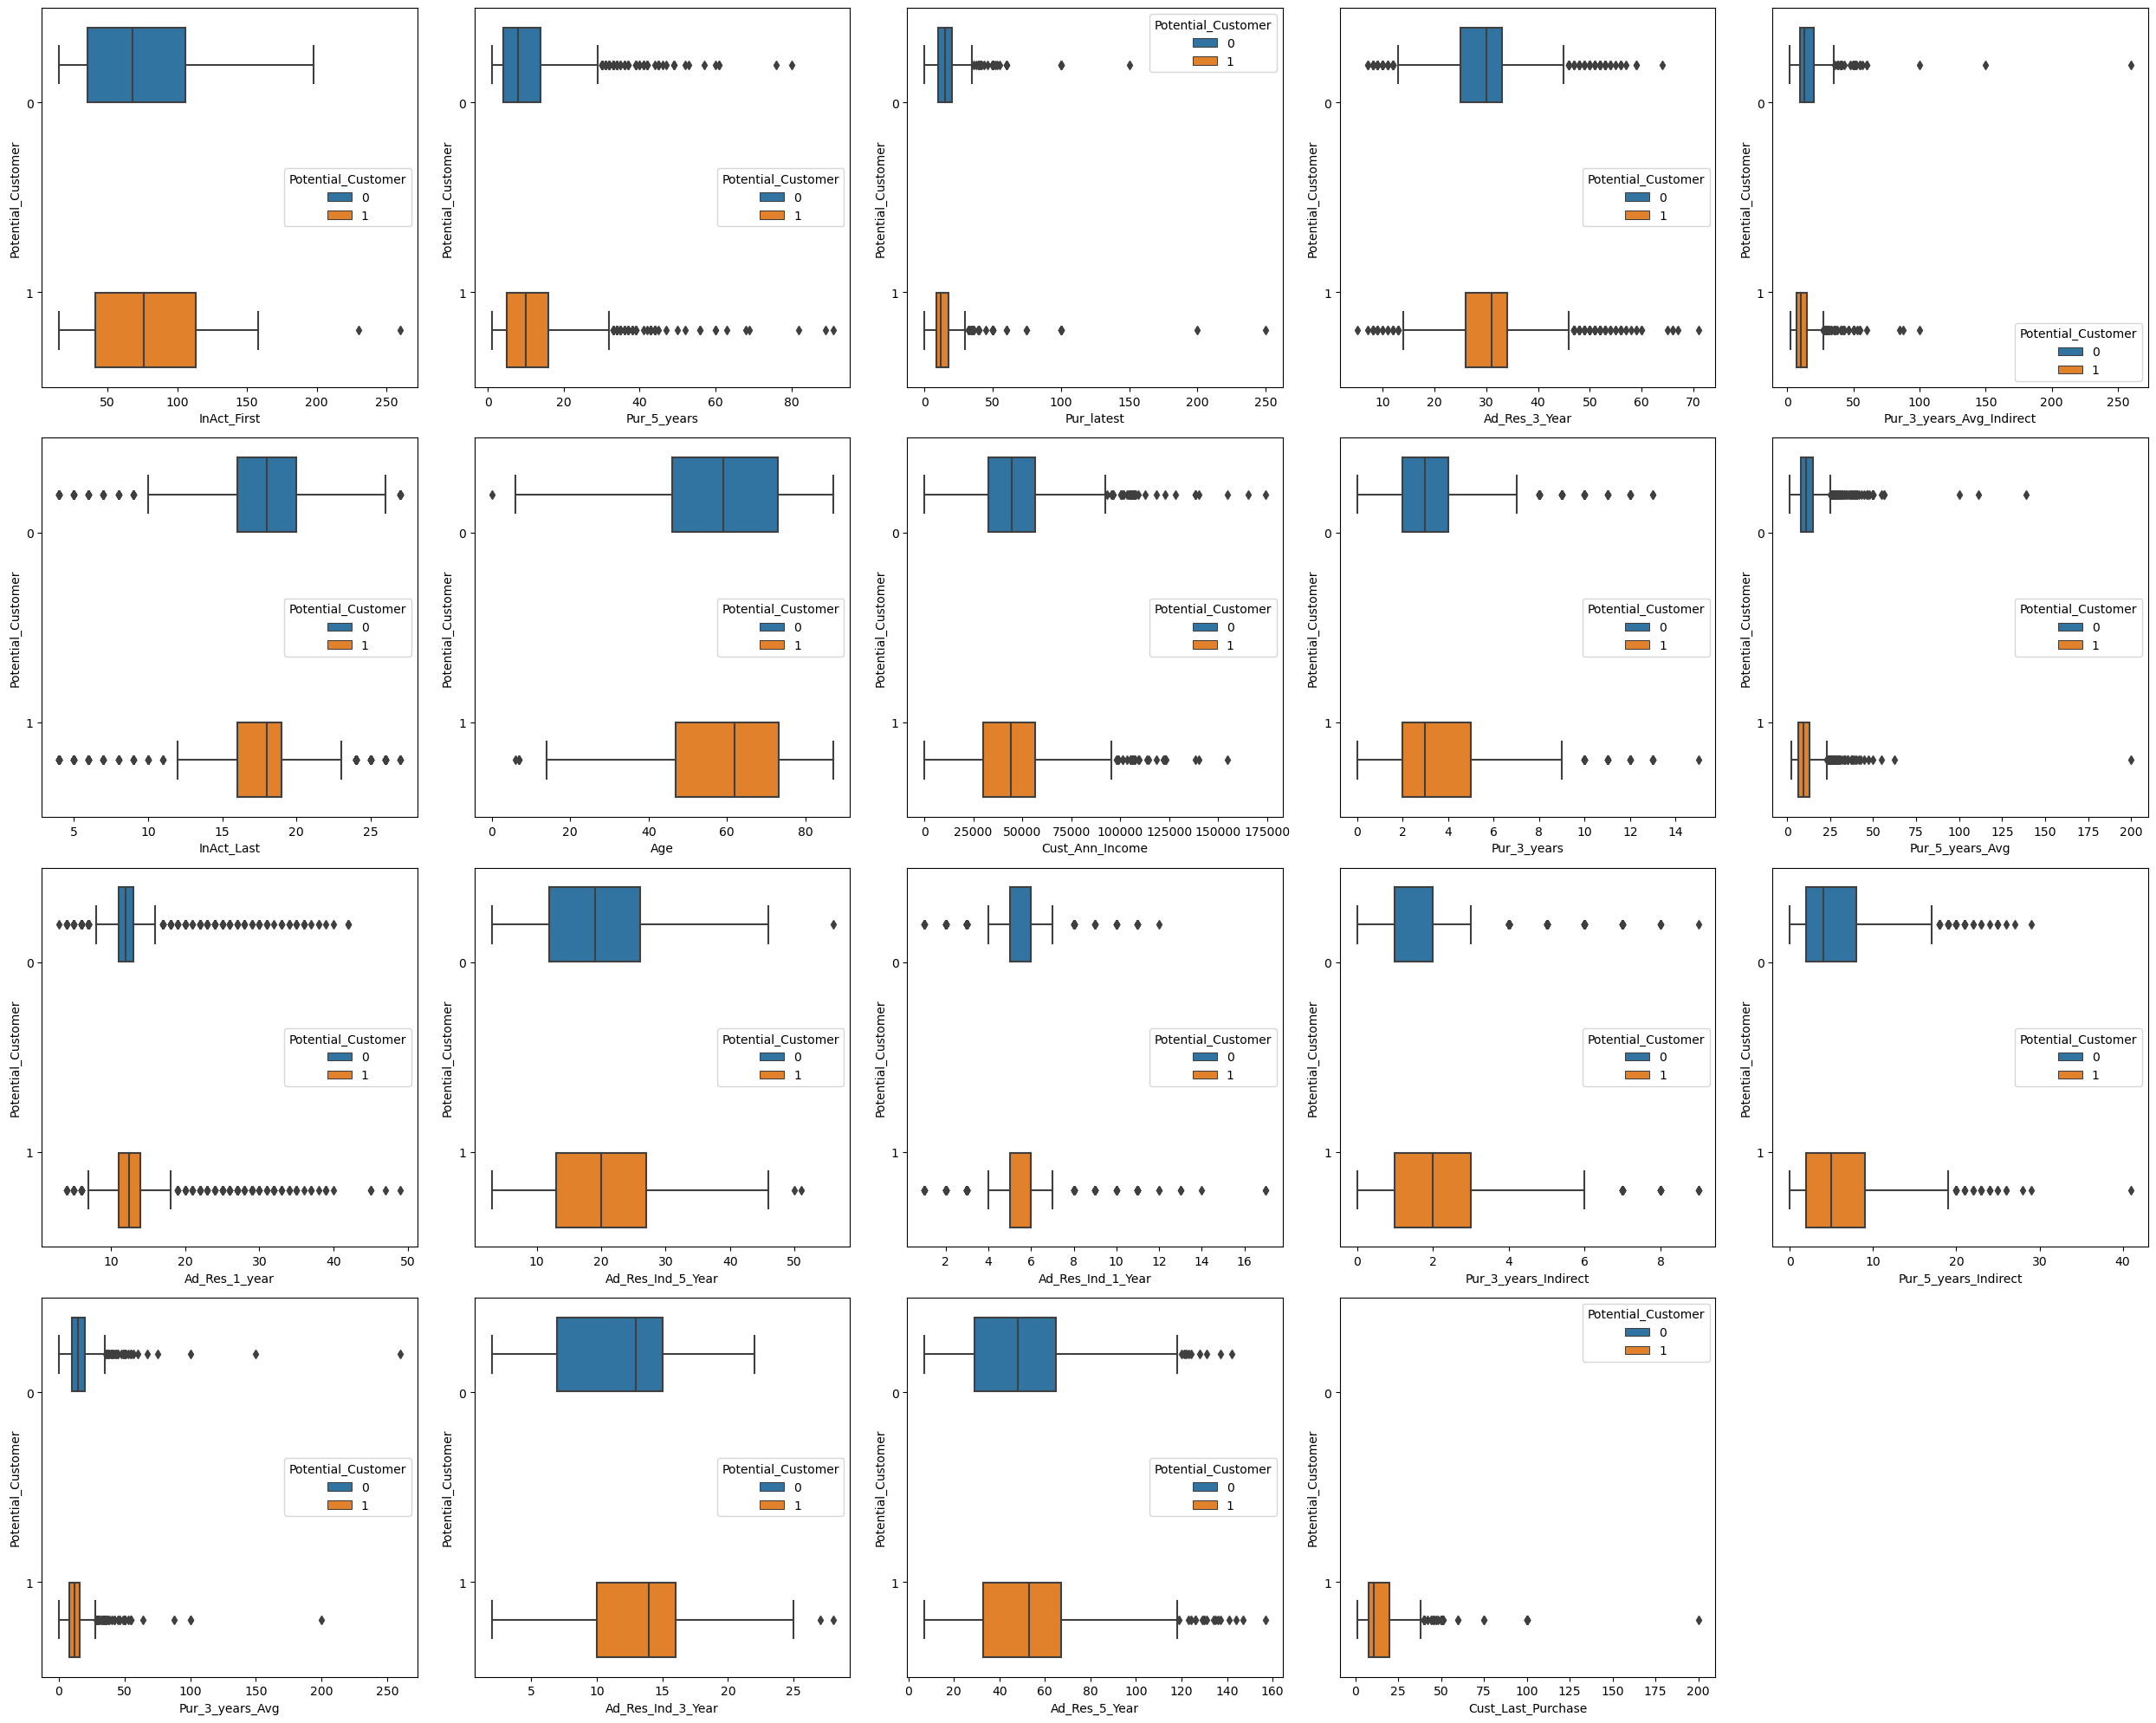

In [24]:
fig, ax = plt.subplots(nrows=len(NumCols)//5+1, ncols=5, figsize=(25, 5*len(NumCols)//5+1))
ax = ax.ravel()
counter = 0
for i, col in enumerate(NumCols):
    sns.boxplot(y=data["Potential_Customer"], x=data[col], hue=data["Potential_Customer"], data=data, ax=ax[i])
    counter += 1
for i in range(counter, len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

# 4. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

## 4.1 Check Correlation between Numerical Variables

<AxesSubplot:>

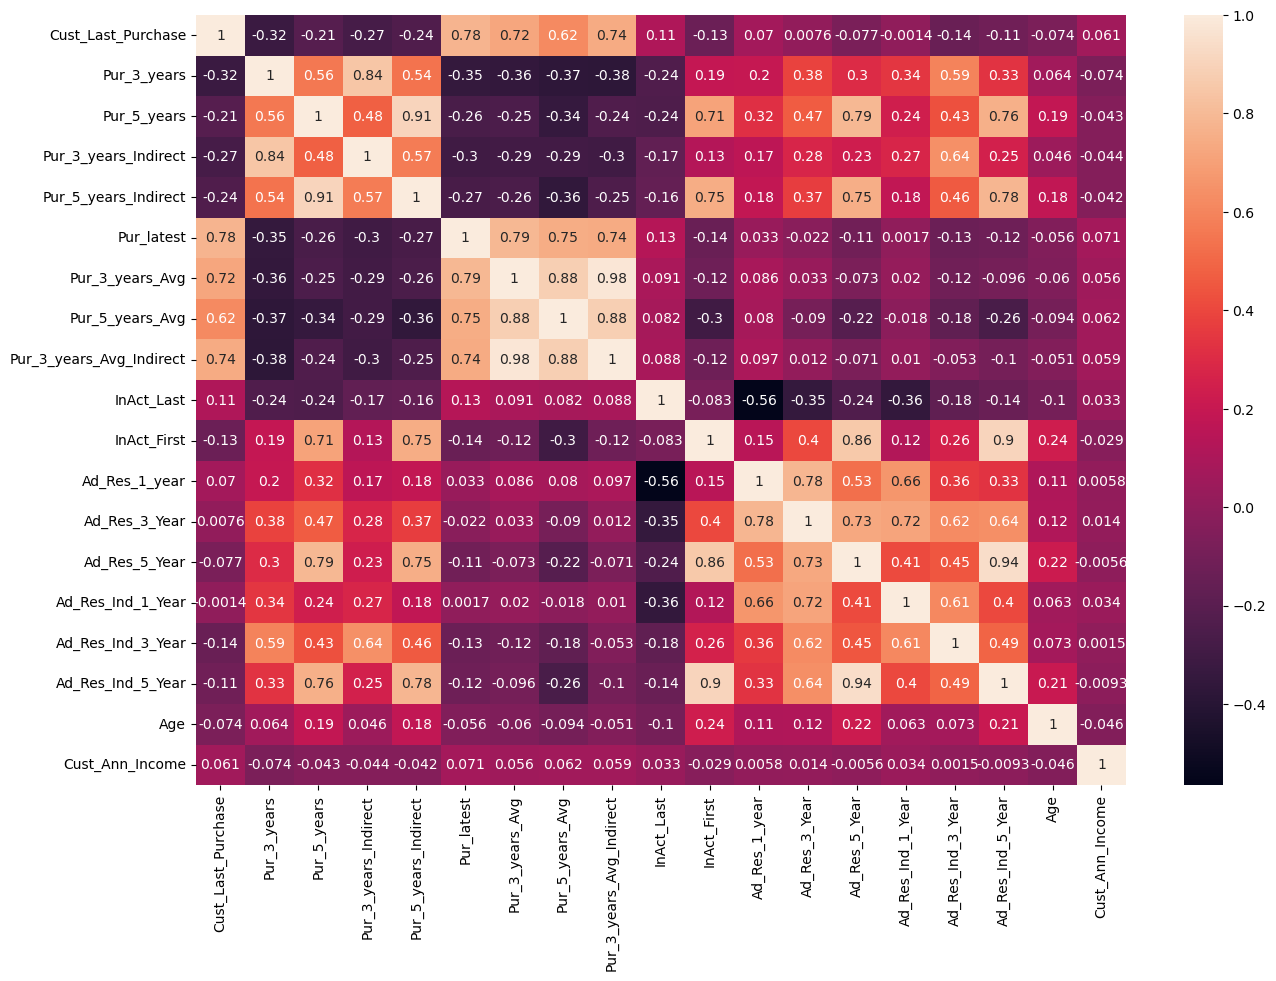

In [25]:
corr= data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True,fmt = ".2g")

High correlation will confuse the ML algorithm, hence will produce the bias output.We use PCA to eliminate noise in the data.

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values

**Attention:** If you decide to impute the missing values with mean/median, you need to calculate mean/median in the train set and then fill the missing values on both train and test with them. The similar rule applies for handling outliers IF you decide to replace outliers with lower/upper fence. You can calculate the UF/LF on the train set only. For this capstone, it is totally up to you to decide replacing the outliers or just using an appropriate scaling technique.

In [26]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')


## 6.2 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

In [27]:
X = data.drop(['Potential_Customer'], axis = 1)  
y = data["Potential_Customer"]

In [28]:
X.shape

(3618, 23)

In [29]:
y.shape

(3618,)

## 6.3 Dummy Variables

Change categorical variables with numerical variables.

Before we create the dummy variable, remember that we have an unknown category in column 'Gender'. We want to remove the Unknown category so we can only focus on Female and Male category for our analysis.

In [30]:
X['Gender'] = X['Gender'].replace('U', X['Gender'].mode()[0])
X["Gender"].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [31]:
X = pd.get_dummies(X, drop_first=True)

In [32]:
X.shape

(3618, 24)

## 6.4 Split data to train/test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
X_train

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income,Status_Cust_Others,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Cust_Prop_U
3151,5.0,4.0,29.0,2.0,9.0,6.0,7.50,5.45,7.00,4.0,...,7.0,15.0,22.0,86.0,55681.0,0,1,1,0,1
1698,16.0,5.0,22.0,4.0,13.0,8.0,8.60,6.82,8.50,9.0,...,11.0,18.0,27.0,63.0,39313.0,0,1,1,0,0
2327,15.0,5.0,8.0,2.0,3.0,10.0,9.60,8.00,10.50,17.0,...,6.0,16.0,16.0,44.0,64119.0,0,0,0,1,0
721,2.0,6.0,7.0,3.0,3.0,5.0,2.67,2.57,3.00,17.0,...,6.0,12.0,10.0,40.0,49122.0,0,0,1,0,0
811,16.0,3.0,15.0,2.0,9.0,10.0,11.33,9.60,12.00,18.0,...,6.0,14.0,30.0,71.0,47917.0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NaN,7.0,45.0,6.0,27.0,15.0,14.14,9.80,13.17,16.0,...,5.0,16.0,33.0,46.0,88242.0,0,1,1,0,1
2424,NaN,2.0,4.0,1.0,2.0,15.0,12.00,9.00,15.00,17.0,...,6.0,14.0,15.0,NaN,0.0,0,0,0,0,1
2788,10.0,3.0,21.0,0.0,11.0,11.0,10.33,5.38,NaN,16.0,...,5.0,5.0,30.0,79.0,63092.0,0,1,1,1,0
1813,NaN,4.0,8.0,2.0,2.0,15.0,12.25,12.38,13.50,22.0,...,6.0,17.0,18.0,79.0,52311.0,0,0,0,0,0


## 6.5 Find and Remove/Impute the Missing Values

In [35]:
## We already check for the null values
# 'Cust_Last_Purchase' = replace with 0
# 'Pur_3_years_Avg_Indirect' = replace with median
# 'Age' = replace with median

<AxesSubplot:xlabel='Pur_3_years_Avg_Indirect', ylabel='Density'>

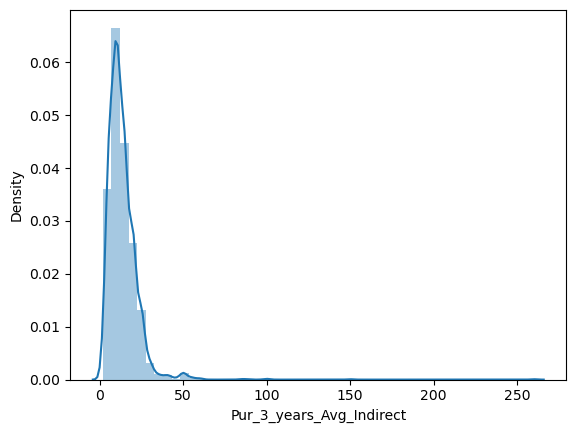

In [36]:
sns.distplot(data['Pur_3_years_Avg_Indirect']) # The data is skewed hence we will use median to fill the missing value

<AxesSubplot:xlabel='Age', ylabel='Density'>

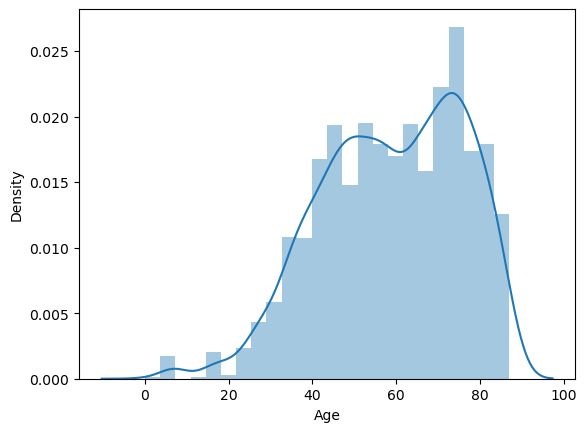

In [37]:
sns.distplot(data['Age'])

In [38]:
X.columns

Index(['Cust_Last_Purchase', 'Pur_3_years', 'Pur_5_years',
       'Pur_3_years_Indirect', 'Pur_5_years_Indirect', 'Pur_latest',
       'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect',
       'InAct_Last', 'InAct_First', 'Ad_Res_1_year', 'Ad_Res_3_Year',
       'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year',
       'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income', 'Status_Cust_Others',
       'Status_Cust_S', 'Status_Latest_Ad_1', 'Gender_M', 'Cust_Prop_U'],
      dtype='object')

In [39]:
X['Cust_Last_Purchase'].fillna(value=0, inplace=True)

In [40]:
# we calculate the median from train data before impute the missing value to both the train and test data
median_pur_3 = X_train['Pur_3_years_Avg_Indirect'].median()
X['Pur_3_years_Avg_Indirect'] = X['Pur_3_years_Avg_Indirect'].fillna(median_pur_3)

In [41]:
# we calculate the median from train data before impute the missing value to both the train and test data
median_age = X_train['Age'].median()
X['Age'] = X['Age'].fillna(median_age)

In [42]:
X.isnull().any()

Cust_Last_Purchase          False
Pur_3_years                 False
Pur_5_years                 False
Pur_3_years_Indirect        False
Pur_5_years_Indirect        False
Pur_latest                  False
Pur_3_years_Avg             False
Pur_5_years_Avg             False
Pur_3_years_Avg_Indirect    False
InAct_Last                  False
InAct_First                 False
Ad_Res_1_year               False
Ad_Res_3_Year               False
Ad_Res_5_Year               False
Ad_Res_Ind_1_Year           False
Ad_Res_Ind_3_Year           False
Ad_Res_Ind_5_Year           False
Age                         False
Cust_Ann_Income             False
Status_Cust_Others          False
Status_Cust_S               False
Status_Latest_Ad_1          False
Gender_M                    False
Cust_Prop_U                 False
dtype: bool

In [43]:
X.head().T

,0,1,2,3,4
Cust_Last_Purchase,5.00,30.00,0.00,20.00,5.00
Pur_3_years,2.00,1.00,5.00,1.00,3.00
Pur_5_years,17.00,7.00,12.00,11.00,15.00
Pur_3_years_Indirect,2.00,0.00,3.00,0.00,2.00
Pur_5_years_Indirect,4.00,3.00,5.00,3.00,7.00
Pur_latest,0.00,25.00,15.00,20.00,3.00
Pur_3_years_Avg,7.50,25.00,15.00,20.00,4.33
Pur_5_years_Avg,7.76,13.00,11.25,12.45,3.80
Pur_3_years_Avg_Indirect,7.50,11.88,14.67,11.88,4.00
InAct_Last,14.00,18.00,19.00,5.00,17.00


In [44]:
X.shape

(3618, 24)

## 6.6 Feature Scaling

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [46]:
X2_train = X_train.loc[:, X_train.columns != 'Cust_Last_Purchase']
X2_test = X_test.loc[:, X_test.columns != 'Cust_Last_Purchase']

In [47]:
scaler = StandardScaler()

In [48]:
scaler = scaler.fit(X2_train)

X_train_scaled = scaler.transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

In [49]:
X_train_scaled

array([[ 0.30892713,  1.90986605,  0.05513538, ...,  0.88063816,
        -0.85002334,  1.11451728],
       [ 0.76196459,  1.16549413,  1.27125164, ...,  0.88063816,
        -0.85002334, -0.89724944],
       [ 0.76196459, -0.32324971,  0.05513538, ..., -1.13554017,
         1.17643828, -0.89724944],
       ...,
       [-0.14411033,  1.05915528, -1.16098087, ...,  0.88063816,
         1.17643828, -0.89724944],
       [ 0.30892713, -0.32324971,  0.05513538, ..., -1.13554017,
        -0.85002334, -0.89724944],
       [-0.59714779,  1.05915528, -1.16098087, ...,  0.88063816,
        -0.85002334,  1.11451728]])

## 6.7 PCA on Numerical Columns only

Save the above scaled train and test data, as dataframe with proper column names.

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X2_train.columns)
X_train_scaled.index=X2_train.index

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X2_test.columns)
X_test_scaled.index=X2_test.index

In [51]:
NewCatCols = ['Status_Cust_Others', 'Status_Cust_S', 'Status_Latest_Ad_1', 'Gender_M', 'Cust_Prop_U']
NewNumCols = list(set(X2_train.columns)-set(NewCatCols))

In [52]:
NewNumCols

['Age',
 'InAct_First',
 'Cust_Ann_Income',
 'Pur_3_years',
 'Pur_5_years',
 'Pur_5_years_Avg',
 'Pur_latest',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Pur_3_years_Avg_Indirect',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_5_Year',
 'InAct_Last']

In [53]:
train_PCA = X_train_scaled[NewNumCols]
test_PCA = X_test_scaled[NewNumCols]

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [55]:
pca_f = pca.fit(train_PCA)

PCA_train = pca_f.transform(train_PCA)
PCA_test = pca_f.transform(test_PCA)

In [56]:
PCA_train = pd.DataFrame(PCA_train, columns=['pca_col1', 'pca_col2'])
PCA_test = pd.DataFrame(PCA_test, columns=['pca_col1', 'pca_col2'])

In [57]:
PCA_train.index = X2_train.index
PCA_test.index = X2_test.index

In [58]:
X_train_pca = pd.concat([PCA_train, X2_train[NewCatCols]], axis=1)
X_test_pca = pd.concat([PCA_test, X2_test[NewCatCols]], axis=1)

In [59]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(2713, 7)
(905, 7)


# 7. Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`.

In [60]:
models = {
    "Logistic Regression"                   : LogisticRegression(),
    "K-Nearest Neighbors"                   : KNeighborsClassifier(),
    "Decision Tree"                         : DecisionTreeClassifier(),
    "Support Vector Machine (RBF Kernel)"   : SVC(),
    "Neural Network"                        : MLPClassifier(),
    "Random Forest"                         : RandomForestClassifier(),
    "Gradient Boosting"                     : GradientBoostingClassifier()
}

mf = {}

for name, model in models.items():
    mf[name] = model.fit(X_train_pca, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [61]:
param_grid = {
    "Logistic Regression": {"C": [0.1, 10], "penalty": ["l1", "l2"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]},
    "Decision Tree": {"max_depth": [3, 5, 7]},
    "Support Vector Machine (RBF Kernel)": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    "Neural Network": {"hidden_layer_sizes": [(10,), (20,), (30,)]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {"n_estimators": [10, 50, 100], "learning_rate": [0.1, 0.5, 1.0]}
}

best_models = {}

for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5)
    grid.fit(X_train_pca, y_train)
    best_models[name] = grid.best_estimator_
    print("Best Hyperparameters:", grid.best_params_)
    print("{} trained.".format(name))
    print('-'*50)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Logistic Regression trained.
--------------------------------------------------
Best Hyperparameters: {'n_neighbors': 7}
K-Nearest Neighbors trained.
--------------------------------------------------
Best Hyperparameters: {'max_depth': 7}
Decision Tree trained.
--------------------------------------------------
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale'}
Support Vector Machine (RBF Kernel) trained.
--------------------------------------------------
Best Hyperparameters: {'hidden_layer_sizes': (10,)}
Neural Network trained.
--------------------------------------------------
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 100}
Random Forest trained.
--------------------------------------------------
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting trained.
--------------------------------------------------


In [62]:
for name, model in mf.items():
    print(name + ": {:.2f}%".format(cross_val_score(model, X.loc[:, X.columns != 'Cust_Last_Purchase'], y, cv=8).mean()*100))

Logistic Regression: 56.88%
K-Nearest Neighbors: 50.83%
Decision Tree: 51.74%
Support Vector Machine (RBF Kernel): 51.47%
Neural Network: 51.82%
Random Forest: 54.89%
Gradient Boosting: 56.19%


We pick **Logistic Regression** which has the highest accuracy score. Put in the best hyperparameter from our grid search to fit a new model.

In [63]:
lr = LogisticRegression(C=10, penalty='l2', random_state=42)
lr = lr.fit(X_train_pca, y_train)
print('Accuracy score of Logistic Regression model' + ": {:.2f}%".format(cross_val_score(lr, X.loc[:, X.columns != 'Cust_Last_Purchase'], y, cv=8).mean()*100))

Accuracy score of Logistic Regression model: 56.99%


With the help of cross-validation, we have improved model accuracy.

In [64]:
y_pred = lr.predict(X_test_pca)

In [65]:
len(y_pred[y_pred == 1])

391

In [66]:
confusion_matrix(y_test, y_pred)

array([[296, 175],
       [218, 216]], dtype=int64)

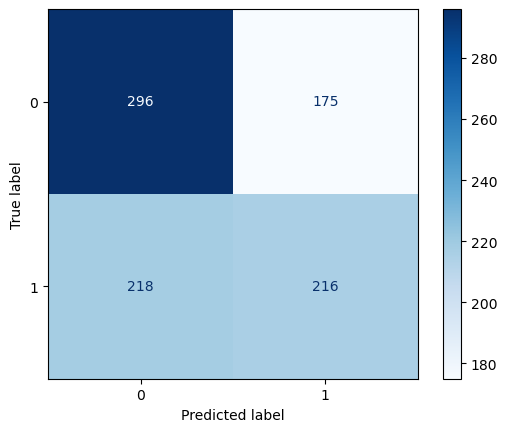

In [67]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test_pca, y_test, cmap=plt.cm.Blues)
plt.show()

$\begin{align}\
&True Positive  &= 216\\
&False Positive &= 175\\
&False Negative &= 218\\
&True Negative  &= 296 \end{align}$

In [88]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.552
Recall: 0.498


# 8. Objective 2

**Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

In [69]:
advertisement_cost = 5

In [70]:
len_last_pur = len(X_train[X_train['Cust_Last_Purchase']>0])
print(len_last_pur)

1302


In [71]:
total_last_pur = sum(X_train['Cust_Last_Purchase'])
print(total_last_pur)

19132.25


In [72]:
average_purchase = round(total_last_pur/len_last_pur, 2)
average_purchase

14.69

In [73]:
TP = 216
FP = 175
FN = 218
TN = 296

In [75]:
m_cost = advertisement_cost * (TP+FP)
m_lost = average_purchase * FN
m_gain = average_purchase * TP
m_value = m_gain - m_lost - m_cost
m_revenue = m_gain - m_cost

In [76]:
print("Model cost     : ${:.2f}".format(m_cost))
print("Model lost     : ${:.2f}".format(m_lost))
print("Model gain     : ${:.2f}".format(m_gain))
print("Model value    : ${:.2f}".format(m_value))
print("Model revenue  : ${:.2f}".format(m_revenue)) 

Model cost     : $1955.00
Model lost     : $3202.42
Model gain     : $3173.04
Model value    : $-1984.38
Model revenue  : $1218.04


# 9. Objective 3
    
**Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost


In [77]:
test_size = len(X_test)
test_size

905

In [78]:
d_cost = advertisement_cost * test_size
d_gain = sum(X_test['Cust_Last_Purchase'])
d_revenue = d_gain - d_cost

In [79]:
print("Cost for Default Solution    : ${:.2f}".format(d_cost))
print("Gain for Default Solution    : ${:.2f}".format(d_gain))
print("Revenue for Default Solution : ${:.2f}".format(d_revenue))

Cost for Default Solution    : $4525.00
Gain for Default Solution    : $6140.00
Revenue for Default Solution : $1615.00


We have the same set of customer from X_test and now we can compare the revenue from both of the solution. For our best model solution we get \\$1218.04 revenue and from default solution we be able to get \\$1615.00 total revenue. From here we can see that our default solution produce a better result.

Remember that we only tested this in rather small target group which is on 905 customers. If we apply our model to a bigger target group it might yield a different result.

# 10. Objective 4
    
**Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10\%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    1) calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    2) calculate the revenue of the default model: send advertisement to everyone
        - cost = advertisement_cost * size of the test set
        - gain = average_purchase * purchase_rate
        - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [83]:
size_test_set = 30000
purchase_rate = 0.1

In [84]:
cust_pur = size_test_set*purchase_rate
cust_pur

3000.0

In [86]:
cust_not_pur = size_test_set - cust_pur
cust_not_pur

27000.0

In [96]:
# to calculate new confusion matrix
# (FN+TP) = cust_pur

# recall = TP/(FN+TP)
TP_new = round(recall*cust_pur)
# precision = TP/(FP+TP)
FP_new = round((TP_new/precision)-TP_new)
FN_new = round(cust_pur - TP_new)
TN_new = round(size_test_set - TP_new - FP_new - FN_new)

print('True Positive:',TP_new)
print('False Positive:',FP_new)
print('False Negative:',FN_new)
print('True Negative:',TN_new)

True Positive: 1493
False Positive: 1210
False Negative: 1507
True Negative: 25790


In [97]:
# Solution from our model for target group of 30,000 customers

m2_cost = advertisement_cost * (TP_new+FP_new)
m2_lost = average_purchase * FN_new
m2_gain = average_purchase * TP_new
m2_value = m2_gain - m2_lost - m2_cost
m2_revenue = m2_gain - m2_cost

print("Model cost     : ${:.2f}".format(m2_cost))
print("Model lost     : ${:.2f}".format(m2_lost))
print("Model gain     : ${:.2f}".format(m2_gain))
print("Model value    : ${:.2f}".format(m2_value))
print("Model revenue  : ${:.2f}".format(m2_revenue))

Model cost     : $13515.00
Model lost     : $22137.83
Model gain     : $21932.17
Model value    : $-13720.66
Model revenue  : $8417.17


In [98]:
# Default solution for target group of 30,000 customers

d2_cost = advertisement_cost * size_test_set
d2_gain = average_purchase * cust_pur
d2_revenue = d2_gain - d2_cost

print("Cost for Default Solution    : ${:.2f}".format(d2_cost))
print("Gain for Default Solution    : ${:.2f}".format(d2_gain))
print("Revenue for Default Solution : ${:.2f}".format(d2_revenue))

Cost for Default Solution    : $150000.00
Gain for Default Solution    : $44070.00
Revenue for Default Solution : $-105930.00


In [100]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tabulate in c:\users\user\anaconda3n\lib\site-packages (0.8.10)



In [101]:
from tabulate import tabulate

In [105]:
print()
print('Cost, Gain and Revenue for target group of 30,000 customers:')
print()
data = [["Cost", m2_cost, d2_cost], 
        ["Gain", m2_gain, d2_gain], 
        ["Revenue", m2_revenue, d2_revenue]]
  
col_names = ["Model Solution", "Default Solution"]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


Cost, Gain and Revenue for target group of 30,000 customers:

╒═════════╤══════════════════╤════════════════════╕
│         │   Model Solution │   Default Solution │
╞═════════╪══════════════════╪════════════════════╡
│ Cost    │         13515    │             150000 │
├─────────┼──────────────────┼────────────────────┤
│ Gain    │         21932.2  │              44070 │
├─────────┼──────────────────┼────────────────────┤
│ Revenue │          8417.17 │            -105930 │
╘═════════╧══════════════════╧════════════════════╛


From the table above, we can see that by using our model we can get total **revenue** of **\\$8,417.17** but when we use the default solution we get negative revenue which means we gain **loss** of **\\$105,930**.

This shows that by **applying our model** for decision making in your business will yield **positive impact** to your business. Hence you can consider using this model in the future as an alternative to the default solution.